# Income Prediction using Machine Learning

This notebook presents a supervised machine learning approach to predict whether an individual earns more than $50,000 per year using census data.

**Dataset:** Adult Census Income (`adult.csv`)



## Importing Required Libraries

This cell imports all the necessary Python libraries used for:
- data handling (pandas, numpy)
- preprocessing
- machine learning model training
- model evaluation

These libraries are widely used and reliable in machine learning projects.

In [297]:
# Core data handling libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

## Loading the Dataset

The Adult Census Income dataset is loaded from a CSV file into a pandas DataFrame. This dataset contains demographic and employment-related attributes.

In [300]:
# Load the dataset from the local CSV file
df = pd.read_csv("adult.csv")

## Dataset Preview

This step displays the first few rows of the dataset. It helps confirm that the data has been loaded correctly and provides an initial understanding of the feature values.

In [303]:
# Display first 5 rows to confirm correct loading
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Viewing Column Names
All column names are displayed as a list to confirm the available features
and ensure that the target variable (`income`) is present.



In [306]:
# Display column names exactly as they appear in the CSV
df.columns.tolist()


['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

## Dataset Information

This step provides detailed information about the dataset, including:
- number of rows and columns
- data types of each feature
- non-null value counts

This information is important for deciding preprocessing steps.

In [309]:
# Display dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Dataset Shape

The shape of the dataset is displayed to show the number of rows and columns at this stage. 

In [312]:
df.shape

(32561, 15)

## Checking for Duplicate Rows

This step checks whether the dataset contains duplicate records. Duplicate rows can bias the learning process and should be removed.

In [315]:
df.duplicated().sum()          # Checks if there are any duplicate rows

24

## Removing Duplicate Rows

Duplicate rows are removed from the dataset to ensure that each data record contributes equally during model training.

In [318]:
# Remove duplicate rows
df = df.drop_duplicates()


## Checking for Duplicate Rows

This step checks whether the dataset contains duplicate records. Duplicate rows can bias the learning process and should be removed.

In [321]:
# Verify no duplicate rows remain
df.duplicated().sum()


0

## Handling Missing Values

In this dataset, missing values are represented using the symbol `?`. These values are replaced with NaN and the corresponding rows are removed to maintain data quality.

In [324]:
# Replace '?' values with NaN
df = df.replace(" ?", np.nan)

# Drop rows with missing values
df = df.dropna()




## Verifying Data Cleaning
This step confirms that no missing values remain after the cleaning process.



In [327]:
# Confirm cleaning
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Dataset Shape

The dataset shape is displayed again to confirm how many rows were removed
during duplicate elimination.


In [330]:
df.shape

(32537, 15)

## Target Variable Distribution

The distribution of income classes is displayed. This confirms that the problem is a binary classification task and helps identify class imbalance.

In [333]:
# Display distribution of income classes
df["income"].value_counts()


income
<=50K    24698
>50K      7839
Name: count, dtype: int64

## Separating Features and Target Variable

Input features (X) and the target variable (income) are separated. This is required before preprocessing and model training.

In [336]:
# Separate input features and target variable
X = df.drop("income", axis=1)
y = df["income"]

# Display feature names
X.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

## Identifying Feature Types

Categorical and numerical features are identified so that appropriate preprocessing techniques can be applied.

In [339]:
# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(exclude=["object"]).columns

categorical_features, numerical_features


(Index(['workclass', 'education', 'marital.status', 'occupation',
        'relationship', 'race', 'sex', 'native.country'],
       dtype='object'),
 Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
        'hours.per.week'],
       dtype='object'))

## Building the Preprocessing Pipeline

Categorical features are encoded using One-Hot Encoding, while numerical features are passed directly. Using a pipeline ensures consistency and prevents data leakage.

In [342]:
# One-hot encode categorical variables
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Numerical features passed directly
numerical_transformer = Pipeline(steps=[
    ("passthrough", "passthrough")
])

# Combine both into a single preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("num", numerical_transformer, numerical_features)
    ]
)


## Train–Test Split

The dataset is split into training and testing sets. This allows the model to be evaluated on unseen data.

In [345]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((26029, 14), (6508, 14))

## Logistic Regression Model

Logistic Regression is trained as a baseline classification model.

In [348]:
# Logistic Regression pipeline
logistic_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Train the model
logistic_model.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

## Decision Tree Model

A Decision Tree model is trained to capture non-linear relationships between features.

In [350]:
# Decision Tree pipeline
dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

# Train the model
dt_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

## Random Forest Model

A Random Forest ensemble model is trained to improve prediction performance and generalization.

In [352]:
# Random Forest pipeline
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])

# Train the model
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Model Evaluation

Model performance is evaluated using accuracy, precision, recall, and F1-score.

In [354]:
# Function to evaluate model performance
def evaluate_model(model, name):
    y_pred = model.predict(X_test)

    print(f"\n{name} Performance")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label=">50K"))
    print("Recall   :", recall_score(y_test, y_pred, pos_label=">50K"))
    print("F1-score :", f1_score(y_test, y_pred, pos_label=">50K"))


In [356]:
evaluate_model(logistic_model, "Logistic Regression")
evaluate_model(dt_model, "Decision Tree")
evaluate_model(rf_model, "Random Forest")



Logistic Regression Performance
Accuracy : 0.8446527350952674
Precision: 0.7018239492466296
Recall   : 0.5822368421052632
F1-score : 0.6364617044228694

Decision Tree Performance
Accuracy : 0.8108481868469576
Precision: 0.5894736842105263
Recall   : 0.6263157894736842
F1-score : 0.6073365231259968

Random Forest Performance
Accuracy : 0.8560233558696988
Precision: 0.7176997759522031
Recall   : 0.6322368421052632
F1-score : 0.6722630290311298


## Model Accuracy

Model accuracy is evaluated 

In [358]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, logistic_model.predict(X_test)),
        accuracy_score(y_test, dt_model.predict(X_test)),
        accuracy_score(y_test, rf_model.predict(X_test))
    ]
})
results


,Model,Accuracy
0,Logistic Regression,0.844653
1,Decision Tree,0.810848
2,Random Forest,0.856023


## Confusion Matrix Analysis 




### Confusion matrix for Logistic Regression

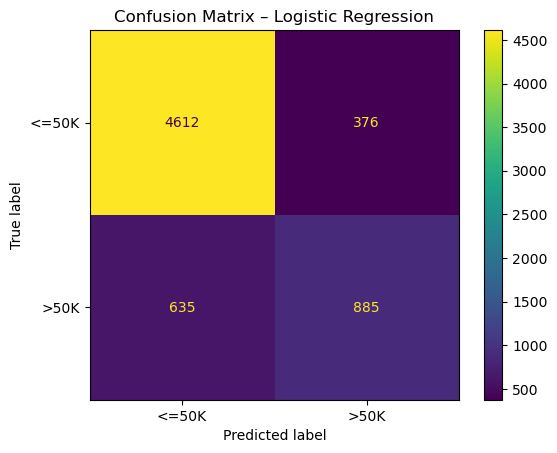

In [362]:
ConfusionMatrixDisplay.from_estimator(
    logistic_model, X_test, y_test
)
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


### Confusion matrix for Decision Tree

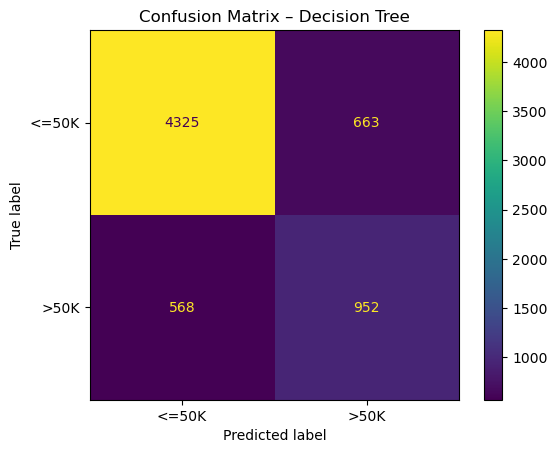

In [364]:
ConfusionMatrixDisplay.from_estimator(
    dt_model, X_test, y_test
)
plt.title("Confusion Matrix – Decision Tree")
plt.show()


### Confusion matrix for Random Forest

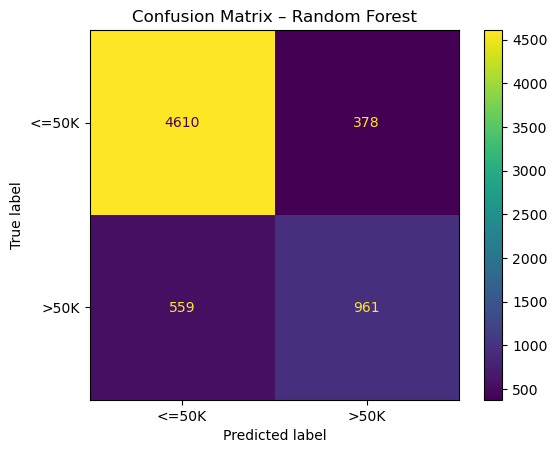

In [366]:
ConfusionMatrixDisplay.from_estimator(
    rf_model, X_test, y_test
)
plt.title("Confusion Matrix – Random Forest")
plt.show()


### Computing Confusion Matrices for Trained Models


In [368]:
cm_lr = confusion_matrix(y_test, logistic_model.predict(X_test))
cm_dt = confusion_matrix(y_test, dt_model.predict(X_test))
cm_rf = confusion_matrix(y_test, rf_model.predict(X_test))


### Comparison of Confusion matrices between each model

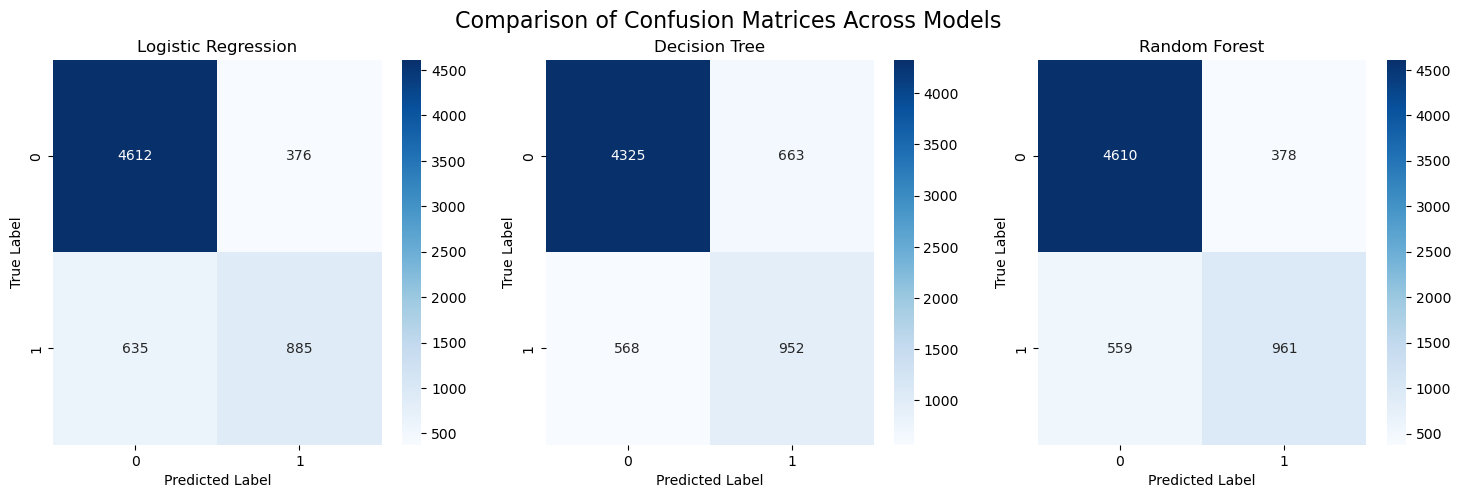

In [370]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Decision Tree")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Random Forest")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("True Label")

plt.suptitle("Comparison of Confusion Matrices Across Models", fontsize=16)
plt.show()


### ROC Curve – Logistic Regression


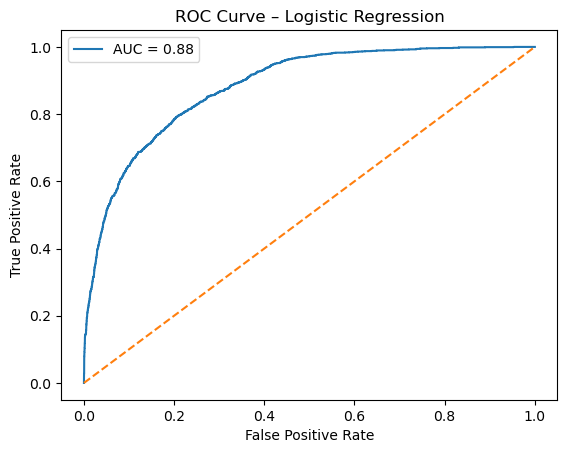

In [372]:
y_prob_lr = logistic_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr, pos_label=">50K")
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"AUC = {roc_auc_lr:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()


### ROC Curve – Decision Tree


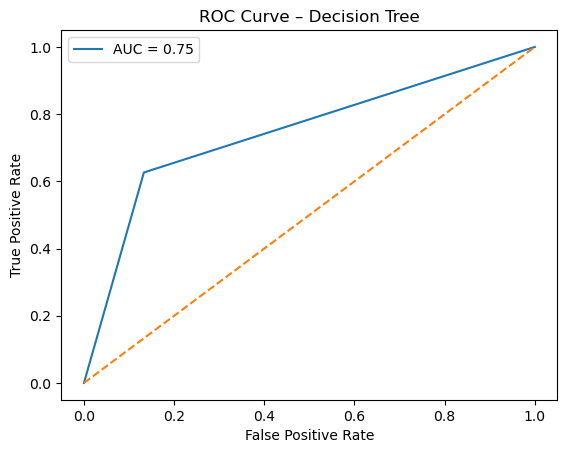

In [374]:
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt, pos_label=">50K")
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f"AUC = {roc_auc_dt:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree")
plt.legend()
plt.show()


### ROC Curve – Random Forest


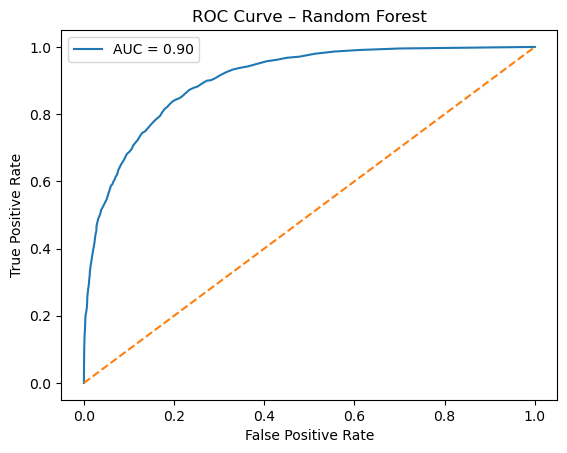

In [376]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label=">50K")
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_rf:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()


### ROC Curve Comparison Across Models


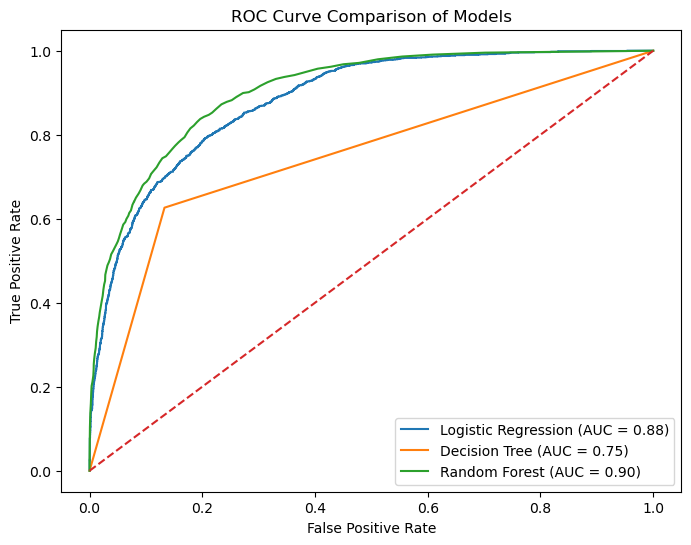

In [378]:
plt.figure(figsize=(8, 6))

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Models")
plt.legend()
plt.show()


### Model Evaluation Using Precision–Recall Curves


#### Prepare test labels for Precision–Recall analysis


The Precision–Recall curve requires the target variable to be in numeric format.
Since the income labels are categorical, they are converted into binary values.
Here, <=50K is mapped to 0 and >50K is mapped to 1.

In [381]:
y_test_binary = y_test.map({"<=50K": 0, ">50K": 1})


#### Generate prediction probabilities for each model

Precision–Recall curves use prediction probabilities instead of direct class labels.
These probabilities represent how confident each model is when predicting the higher income class.

In [383]:
# Logistic Regression probabilities
lr_probs = logistic_model.predict_proba(X_test)[:, 1]

# Decision Tree probabilities
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# Random Forest probabilities
rf_probs = rf_model.predict_proba(X_test)[:, 1]


#### Compute precision and recall values

Precision and recall values are calculated across different decision thresholds.
This allows analysis of how model performance changes as the classification threshold varies.

In [385]:
precision_lr, recall_lr, _ = precision_recall_curve(y_test_binary, lr_probs)
precision_dt, recall_dt, _ = precision_recall_curve(y_test_binary, dt_probs)
precision_rf, recall_rf, _ = precision_recall_curve(y_test_binary, rf_probs)


#### Plot the Precision–Recall curves

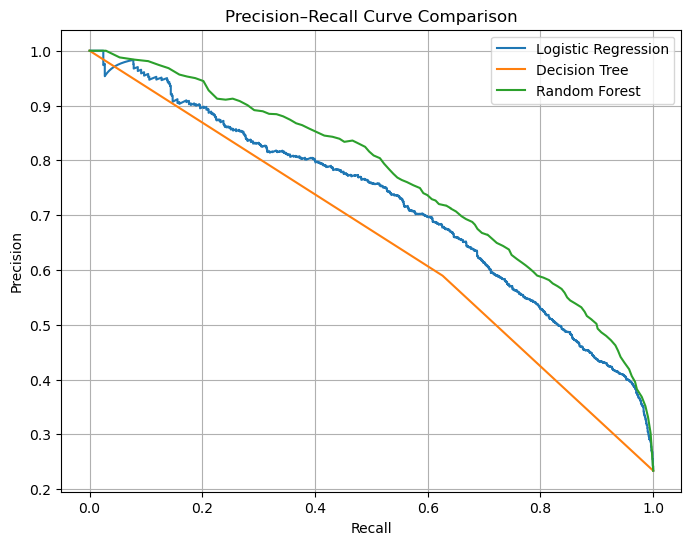

In [387]:
plt.figure(figsize=(8, 6))

plt.plot(recall_lr, precision_lr, label="Logistic Regression")
plt.plot(recall_dt, precision_dt, label="Decision Tree")
plt.plot(recall_rf, precision_rf, label="Random Forest")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


#### Calculate Average Precision score

The average precision score provides a single numeric value summarizing the Precision–Recall curve.
Higher values indicate better performance in identifying higher-income individuals.

In [389]:
print("Average Precision Scores")
print("Logistic Regression:", average_precision_score(y_test_binary, lr_probs))
print("Decision Tree:", average_precision_score(y_test_binary, dt_probs))
print("Random Forest:", average_precision_score(y_test_binary, rf_probs))


Average Precision Scores
Logistic Regression: 0.7183863160689331
Decision Tree: 0.4564738731959131
Random Forest: 0.761419066087024


## Sample Test Data Prediction and Error Analysis


### Selecting Sample Test Data for Prediction Analysis


In [392]:
# Select a small sample from the test set for demonstration
sample_X = X_test.sample(10, random_state=42)
sample_y = y_test.loc[sample_X.index]


#### Logistic Regression – Actual vs Predicted Income


In [394]:
lr_predictions = logistic_model.predict(sample_X)

lr_results = pd.DataFrame({
    "Actual Income": sample_y.values,
    "Predicted Income": lr_predictions
})

lr_results


,Actual Income,Predicted Income
0,<=50K,<=50K
1,<=50K,<=50K
2,>50K,>50K
3,<=50K,<=50K
4,<=50K,<=50K
5,>50K,>50K
6,<=50K,<=50K
7,<=50K,<=50K
8,<=50K,<=50K
9,<=50K,<=50K


#### Decision Tree – Actual vs Predicted Income


In [396]:
dt_predictions = dt_model.predict(sample_X)

dt_results = pd.DataFrame({
    "Actual Income": sample_y.values,
    "Predicted Income": dt_predictions
})

dt_results


,Actual Income,Predicted Income
0,<=50K,<=50K
1,<=50K,<=50K
2,>50K,>50K
3,<=50K,>50K
4,<=50K,<=50K
5,>50K,>50K
6,<=50K,<=50K
7,<=50K,<=50K
8,<=50K,<=50K
9,<=50K,<=50K


#### Random Forest – Actual vs Predicted Income


In [400]:
rf_predictions = rf_model.predict(sample_X)

rf_results = pd.DataFrame({
    "Actual Income": sample_y.values,
    "Predicted Income": rf_predictions
})

rf_results


,Actual Income,Predicted Income
0,<=50K,<=50K
1,<=50K,<=50K
2,>50K,>50K
3,<=50K,<=50K
4,<=50K,<=50K
5,>50K,>50K
6,<=50K,<=50K
7,<=50K,<=50K
8,<=50K,<=50K
9,<=50K,<=50K


### Generating Predictions Using Trained Models


In [403]:
lr_pred = logistic_model.predict(sample_X)
dt_pred = dt_model.predict(sample_X)
rf_pred = rf_model.predict(sample_X)


In [405]:
prediction_comparison = pd.DataFrame({
    "Actual Income": sample_y.values,
    "Logistic Regression Prediction": lr_pred,
    "Decision Tree Prediction": dt_pred,
    "Random Forest Prediction": rf_pred
})

prediction_comparison


,Actual Income,Logistic Regression Prediction,Decision Tree Prediction,Random Forest Prediction
0,<=50K,<=50K,<=50K,<=50K
1,<=50K,<=50K,<=50K,<=50K
2,>50K,>50K,>50K,>50K
3,<=50K,<=50K,>50K,<=50K
4,<=50K,<=50K,<=50K,<=50K
5,>50K,>50K,>50K,>50K
6,<=50K,<=50K,<=50K,<=50K
7,<=50K,<=50K,<=50K,<=50K
8,<=50K,<=50K,<=50K,<=50K
9,<=50K,<=50K,<=50K,<=50K


In [408]:
prediction_comparison["LR Correct"] = (
    prediction_comparison["Actual Income"] ==
    prediction_comparison["Logistic Regression Prediction"]
)

prediction_comparison["DT Correct"] = (
    prediction_comparison["Actual Income"] ==
    prediction_comparison["Decision Tree Prediction"]
)

prediction_comparison["RF Correct"] = (
    prediction_comparison["Actual Income"] ==
    prediction_comparison["Random Forest Prediction"]
)

prediction_comparison


,Actual Income,Logistic Regression Prediction,Decision Tree Prediction,Random Forest Prediction,LR Correct,DT Correct,RF Correct
0,<=50K,<=50K,<=50K,<=50K,True,True,True
1,<=50K,<=50K,<=50K,<=50K,True,True,True
2,>50K,>50K,>50K,>50K,True,True,True
3,<=50K,<=50K,>50K,<=50K,True,False,True
4,<=50K,<=50K,<=50K,<=50K,True,True,True
5,>50K,>50K,>50K,>50K,True,True,True
6,<=50K,<=50K,<=50K,<=50K,True,True,True
7,<=50K,<=50K,<=50K,<=50K,True,True,True
8,<=50K,<=50K,<=50K,<=50K,True,True,True
9,<=50K,<=50K,<=50K,<=50K,True,True,True


### Analysis of Prediction Disagreements Across Models


In [412]:
disagreement_rows = prediction_comparison[
    (prediction_comparison["LR Correct"] == False) |
    (prediction_comparison["DT Correct"] == False) |
    (prediction_comparison["RF Correct"] == False)
]

disagreement_rows


,Actual Income,Logistic Regression Prediction,Decision Tree Prediction,Random Forest Prediction,LR Correct,DT Correct,RF Correct
3,<=50K,<=50K,>50K,<=50K,True,False,True


### Summary of Prediction Errors by Each Model


In [418]:
mistake_summary = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Mistakes Made": [
        (~prediction_comparison["LR Correct"]).sum(),
        (~prediction_comparison["DT Correct"]).sum(),
        (~prediction_comparison["RF Correct"]).sum()
    ]
})

mistake_summary


,Model,Mistakes Made
0,Logistic Regression,0
1,Decision Tree,1
2,Random Forest,0
